- Curso: https://www.udemy.com/course/tensorflow-machine-learning-deep-learning-python/

### Projeto - Prever a formula da relação entre graus celsius e fahrenheit

Iremos fazer ela encontrar a Fórmula de Fahrenheits (y) em função de graus Celsius (x)

x - Variável indepêndente

y - Variável dependente

Técnica de regressão

Iremos fazer uma engenharia reversa... temos os dados respectivos através da formula, mas iremos treinar nosso NN para aprender

In [1]:
# 1-) Importar Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# 2-) Importar Banco de Dados

In [6]:
temperatura_df = pd.read_csv('./dados/celsius.csv')
temperatura_df.reset_index(drop = True, inplace = True)

In [7]:
temperatura_df.head(5) #5 primeiros

,Celsius,Fahrenheit
0,-50,-58.0
1,-40,-40.0
2,-30,-22.0
3,-20,-4.0
4,-10,14.0


In [8]:
temperatura_df.tail(5) #5 últimos

,Celsius,Fahrenheit
25,20,68.0
26,30,86.0
27,40,104.0
28,50,122.0
29,60,140.0


In [9]:
temperatura_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Celsius       30 non-null int64
Fahrenheit    30 non-null float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


In [10]:
temperatura_df.describe()

,Celsius,Fahrenheit
count,30.000000,30.000000
mean,2.000000,35.600000
std,22.780815,41.005466
min,-50.000000,-58.000000
25%,-6.750000,19.850000
50%,0.500000,32.900000
75%,7.750000,45.950000
max,60.000000,140.000000


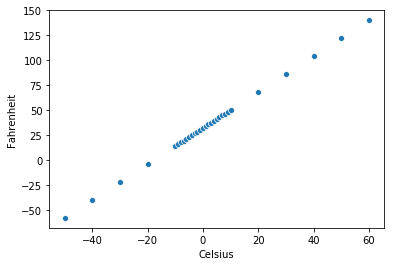

In [11]:
sns.scatterplot(temperatura_df['Celsius'],
               temperatura_df['Fahrenheit'])

In [12]:
# 3-) Configuração para treinamento

In [19]:
X_train = np.array(temperatura_df['Celsius'])
y_train = np.array(temperatura_df['Fahrenheit'])

In [27]:
X_train = X_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm = LinearRegression()

In [28]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
pred = lm.predict(X_train)

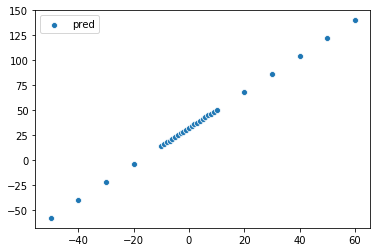

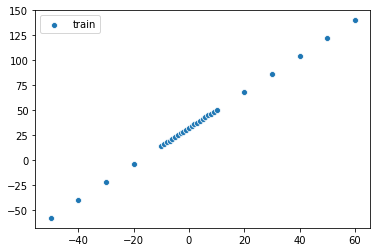

In [36]:
sns.scatterplot(x = X_train[:,0] ,y = pred[:,0],label = 'pred')
plt.figure()
sns.scatterplot(x = X_train[:,0] ,y = y_train[:,0], label = 'train')
plt.legend()

<img src = "img/camada.png" style="max-width:50%; width: 30%;">

In [43]:
#Qual a temperatura em Fahrenheits de 100 graus celsius??
lm.predict([[60]])


array([[140.]])

In [45]:
# Nosso modelo está funcionando

#Agora vamos passar nosso modelo para o Disco


In [46]:
from sklearn.externals import joblib

/home/miguel/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [47]:
joblib.dump(lm,'modelo.pkl')

['modelo.pkl']

In [54]:
# Veja que importamos nosso Modelo e deu
# o mesmo resultado

In [49]:
model = joblib.load('./modelo.pkl')

In [53]:
model.predict([[60]])

array([[140.]])